In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk # linear algebra

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (12,8)
sns.set()

In [7]:
# create a dataset with four centers
from sklearn.datasets import make_blobs


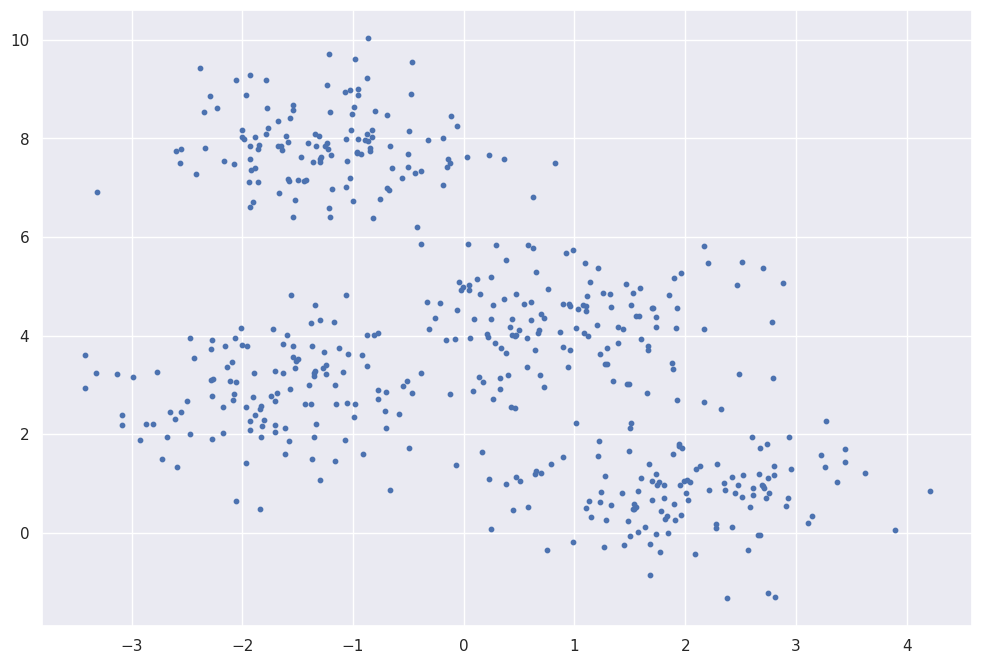

In [9]:
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=.8, random_state=0)
plt.scatter(X[:,0], X[:,1], s=10)

In [10]:
# train the cluster model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [11]:
# perform the classification
y = kmeans.predict(X)

# see how four categories (centers) have been found
y[:10]

array([0, 0, 1, 1, 0, 2, 1, 1, 1, 3], dtype=int32)

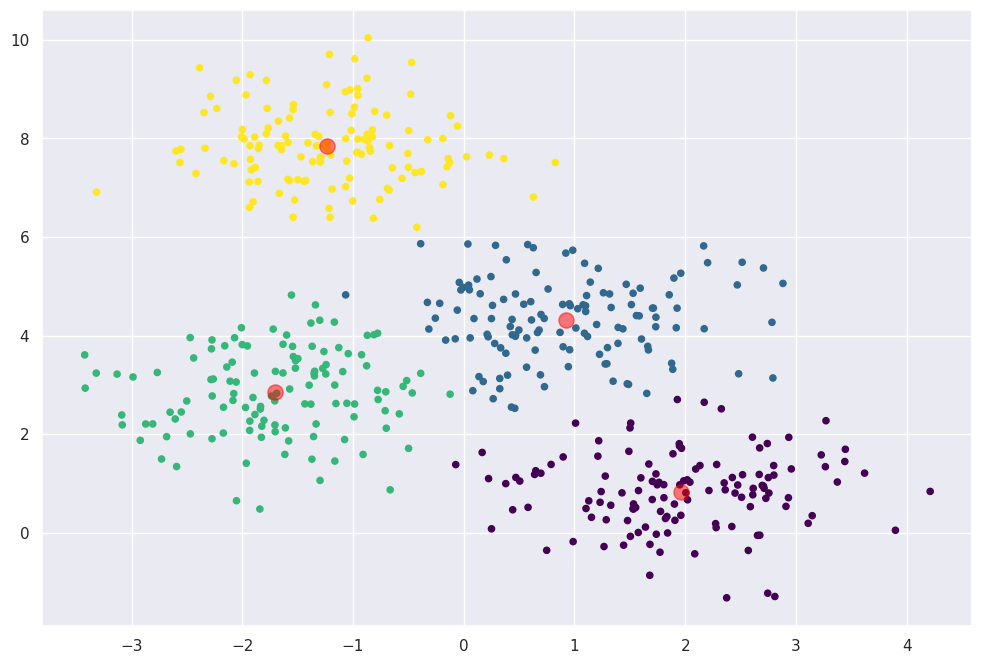

In [12]:
#plot the dataset by categories, with centroids

plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap="viridis")
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], c="red", alpha=0.5, s=120)

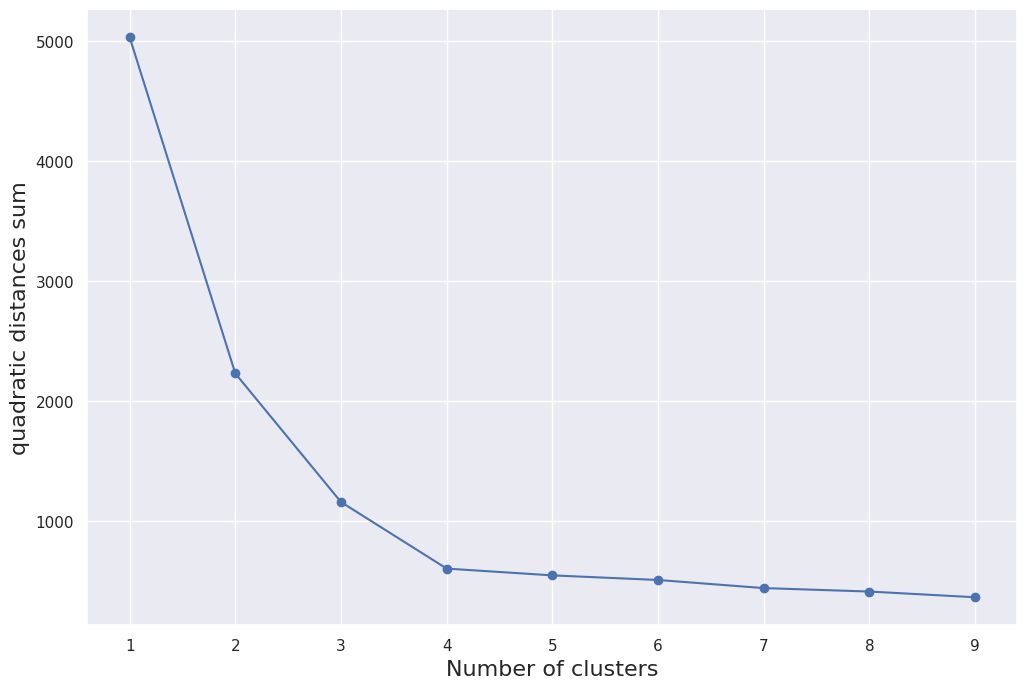

In [13]:
# to understand how many centroids the model has to be trained with,
# plot many models and check when the curve starts rising (look for the elbow)
ssd = {}

for k in range(1,10):
    kmeans = KMeans(init="k-means++", n_clusters=k)
    kmeans.fit(X)
    ssd[k] = kmeans.inertia_
plt.plot(list(ssd.keys()), list(ssd.values()), marker="o")
plt.xlabel("Number of clusters", fontsize=16)
plt.ylabel("quadratic distances sum", fontsize=16)
plt.show()

#see that the elbow here is for k = 4